In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory
print(tf.__version__)
print(tf.keras.__version__)

2.18.0
3.8.0


In [11]:
## Data Preparation

In [12]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)


Found 76515 files belonging to 4 classes.


In [13]:
validation_set = image_dataset_from_directory(
    "./val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)


Found 21861 files belonging to 4 classes.


In [14]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [15]:
INPUT_SHAPE = (224,224,3)

In [16]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

22661472/22661472 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
#if you want to learn transfer learning ,then use it excecute this cell
# mobnet.trainable = False #-- used to free weights of this pretrained model

In [34]:
model = tf.keras.models.Sequential()


In [35]:
model.add(tf.keras.Input(shape=INPUT_SHAPE)) #input layer

In [36]:
model.add(mobnet)

In [37]:
model.add(tf.keras.layers.Dense(units=4,activation="softmax")) #output layer

In [38]:
metrics_list = ["accuracy",tf.keras.metrics.F1Score()]

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy",metrics=metrics_list)

In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15) # 12-hour training required

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3374s 1s/step - accuracy: 0.8007 - f1_score: 0.4487 - loss: 1.2202 - val_accuracy: 0.8702 - val_f1_score: 0.6472 - val_loss: 0.9872
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3210s 1s/step - accuracy: 0.8958 - f1_score: 0.6923 - loss: 0.9128 - val_accuracy: 0.8953 - val_f1_score: 0.6922 - val_loss: 0.7619
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3206s 1s/step - accuracy: 0.9007 - f1_score: 0.6996 - loss: 0.7176 - val_accuracy: 0.9054 - val_f1_score: 0.7052 - val_loss: 0.6144
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3200s 1s/step - accuracy: 0.8993 - f1_score: 0.7034 - loss: 0.5727 - val_accuracy: 0.9027 - val_f1_score: 0.7011 - val_loss: 0.4940
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3199s 1s/step - accuracy: 0.9079 - f1_score: 0.7284 - loss: 0.4447 - val_accuracy: 0.9554 - val_f1_score: 0.9177 - val_loss: 0.3833
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3215s 1s/step - accuracy: 0.9612 - f1_score: 0.9315 - loss: 0.3533 - val_accuracy: 0.958

In [44]:
model.save("./Trained_Eye_disease_model.h5")
model.save("./Trained_Eye_disease_model.keras")

In [47]:
#Saving history
import pickle
with open("Trained_history.pkl","wb") as f:
    pickle.dump(training_history.history,f)

In [5]:
#Reloading History From Pickle File
import pickle
with open("Trained_history.pkl","rb") as f:
    load_history = pickle.load(f)
print(load_history)    

{'accuracy': [0.8202835917472839, 0.89735347032547, 0.9002810120582581, 0.8986865282058716, 0.9228255748748779, 0.9631575345993042, 0.9696268439292908, 0.9727635383605957, 0.976161539554596, 0.9803436994552612, 0.983022928237915, 0.9845651388168335, 0.9868783950805664, 0.9879500865936279, 0.989361584186554], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8892085 , 0.28974968, 0.        , 0.8985547 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8940988 , 0.910278  , 0.        , 0.97342926], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.89374113, 0.92380536, 0.        , 0.97715783], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9330748 , 0.93864685, 0.        , 0.938841  ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.91384673, 0.9473878 , 0.40822315, 0.9826498 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9667659 , 0.95283884, 0.8364784 ,

In [6]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

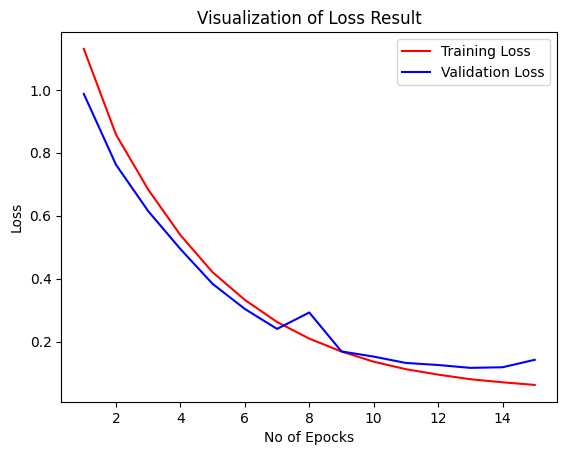

In [ ]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label="Training Loss")
plt.plot(epochs,load_history['val_loss'],color='blue',label="Validation Loss")
plt.xlabel("No of Epocks")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()  

In [8]:
## Model Evaluation

In [14]:
model = tf.keras.models.load_model("Trained_Eye_disease_model.keras")

C:\Users\MILIND- 0509\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 178 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
import os
print(os.getcwd())

d:\OneDrive\Desktop\Dataset - train+val+test


In [4]:
print(os.path.exists("./Trained_Eye_disease_model.h5"))

True


In [8]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,998,474 (41.96 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,487,038 (20.93 MB)

In [25]:
test_set = image_dataset_from_directory(
    "./test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)


Found 10932 files belonging to 4 classes.


In [26]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 91s 267ms/step - accuracy: 0.9444 - f1_score: 0.6239 - loss: 0.1828


In [27]:
test_loss,test_acc,f1_score

(0.15121842920780182,
 0.9585620164871216,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9595598 , 0.9381879 , 0.84156895, 0.98490596], dtype=float32)>)

In [28]:
#Computing True Label From Test Set
true_categories = tf.concat([y for x, y in test_set], axis=0)

Y_true = tf.argmax(true_categories,axis=1)

In [29]:
true_categories

<tf.Tensor: shape=(10932, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [30]:
Y_true

<tf.Tensor: shape=(10932,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [31]:
#Computing Predicting Label From Test_set
predicted_categories = model.predict(test_set)
predicted_categories

342/342 ━━━━━━━━━━━━━━━━━━━━ 83s 241ms/step


array([[0.9832743 , 0.00404857, 0.00867759, 0.00399959],
       [0.97685754, 0.00694468, 0.01075717, 0.00544064],
       [0.9738885 , 0.00702362, 0.0130777 , 0.00601018],
       ...,
       [0.00306776, 0.00376441, 0.00551273, 0.9876551 ],
       [0.00306776, 0.00376441, 0.00551273, 0.9876551 ],
       [0.00306776, 0.00376441, 0.00551273, 0.9876551 ]], dtype=float32)

In [32]:
Y_Pred = tf.argmax(predicted_categories,axis=1)
Y_Pred

<tf.Tensor: shape=(10932,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [ ]:
##1. Classification Reports

In [ ]:
##Confusion Matrix

TypeError: heatmap() missing 1 required positional argument: 'data'

<Figure size 1000x1000 with 0 Axes>